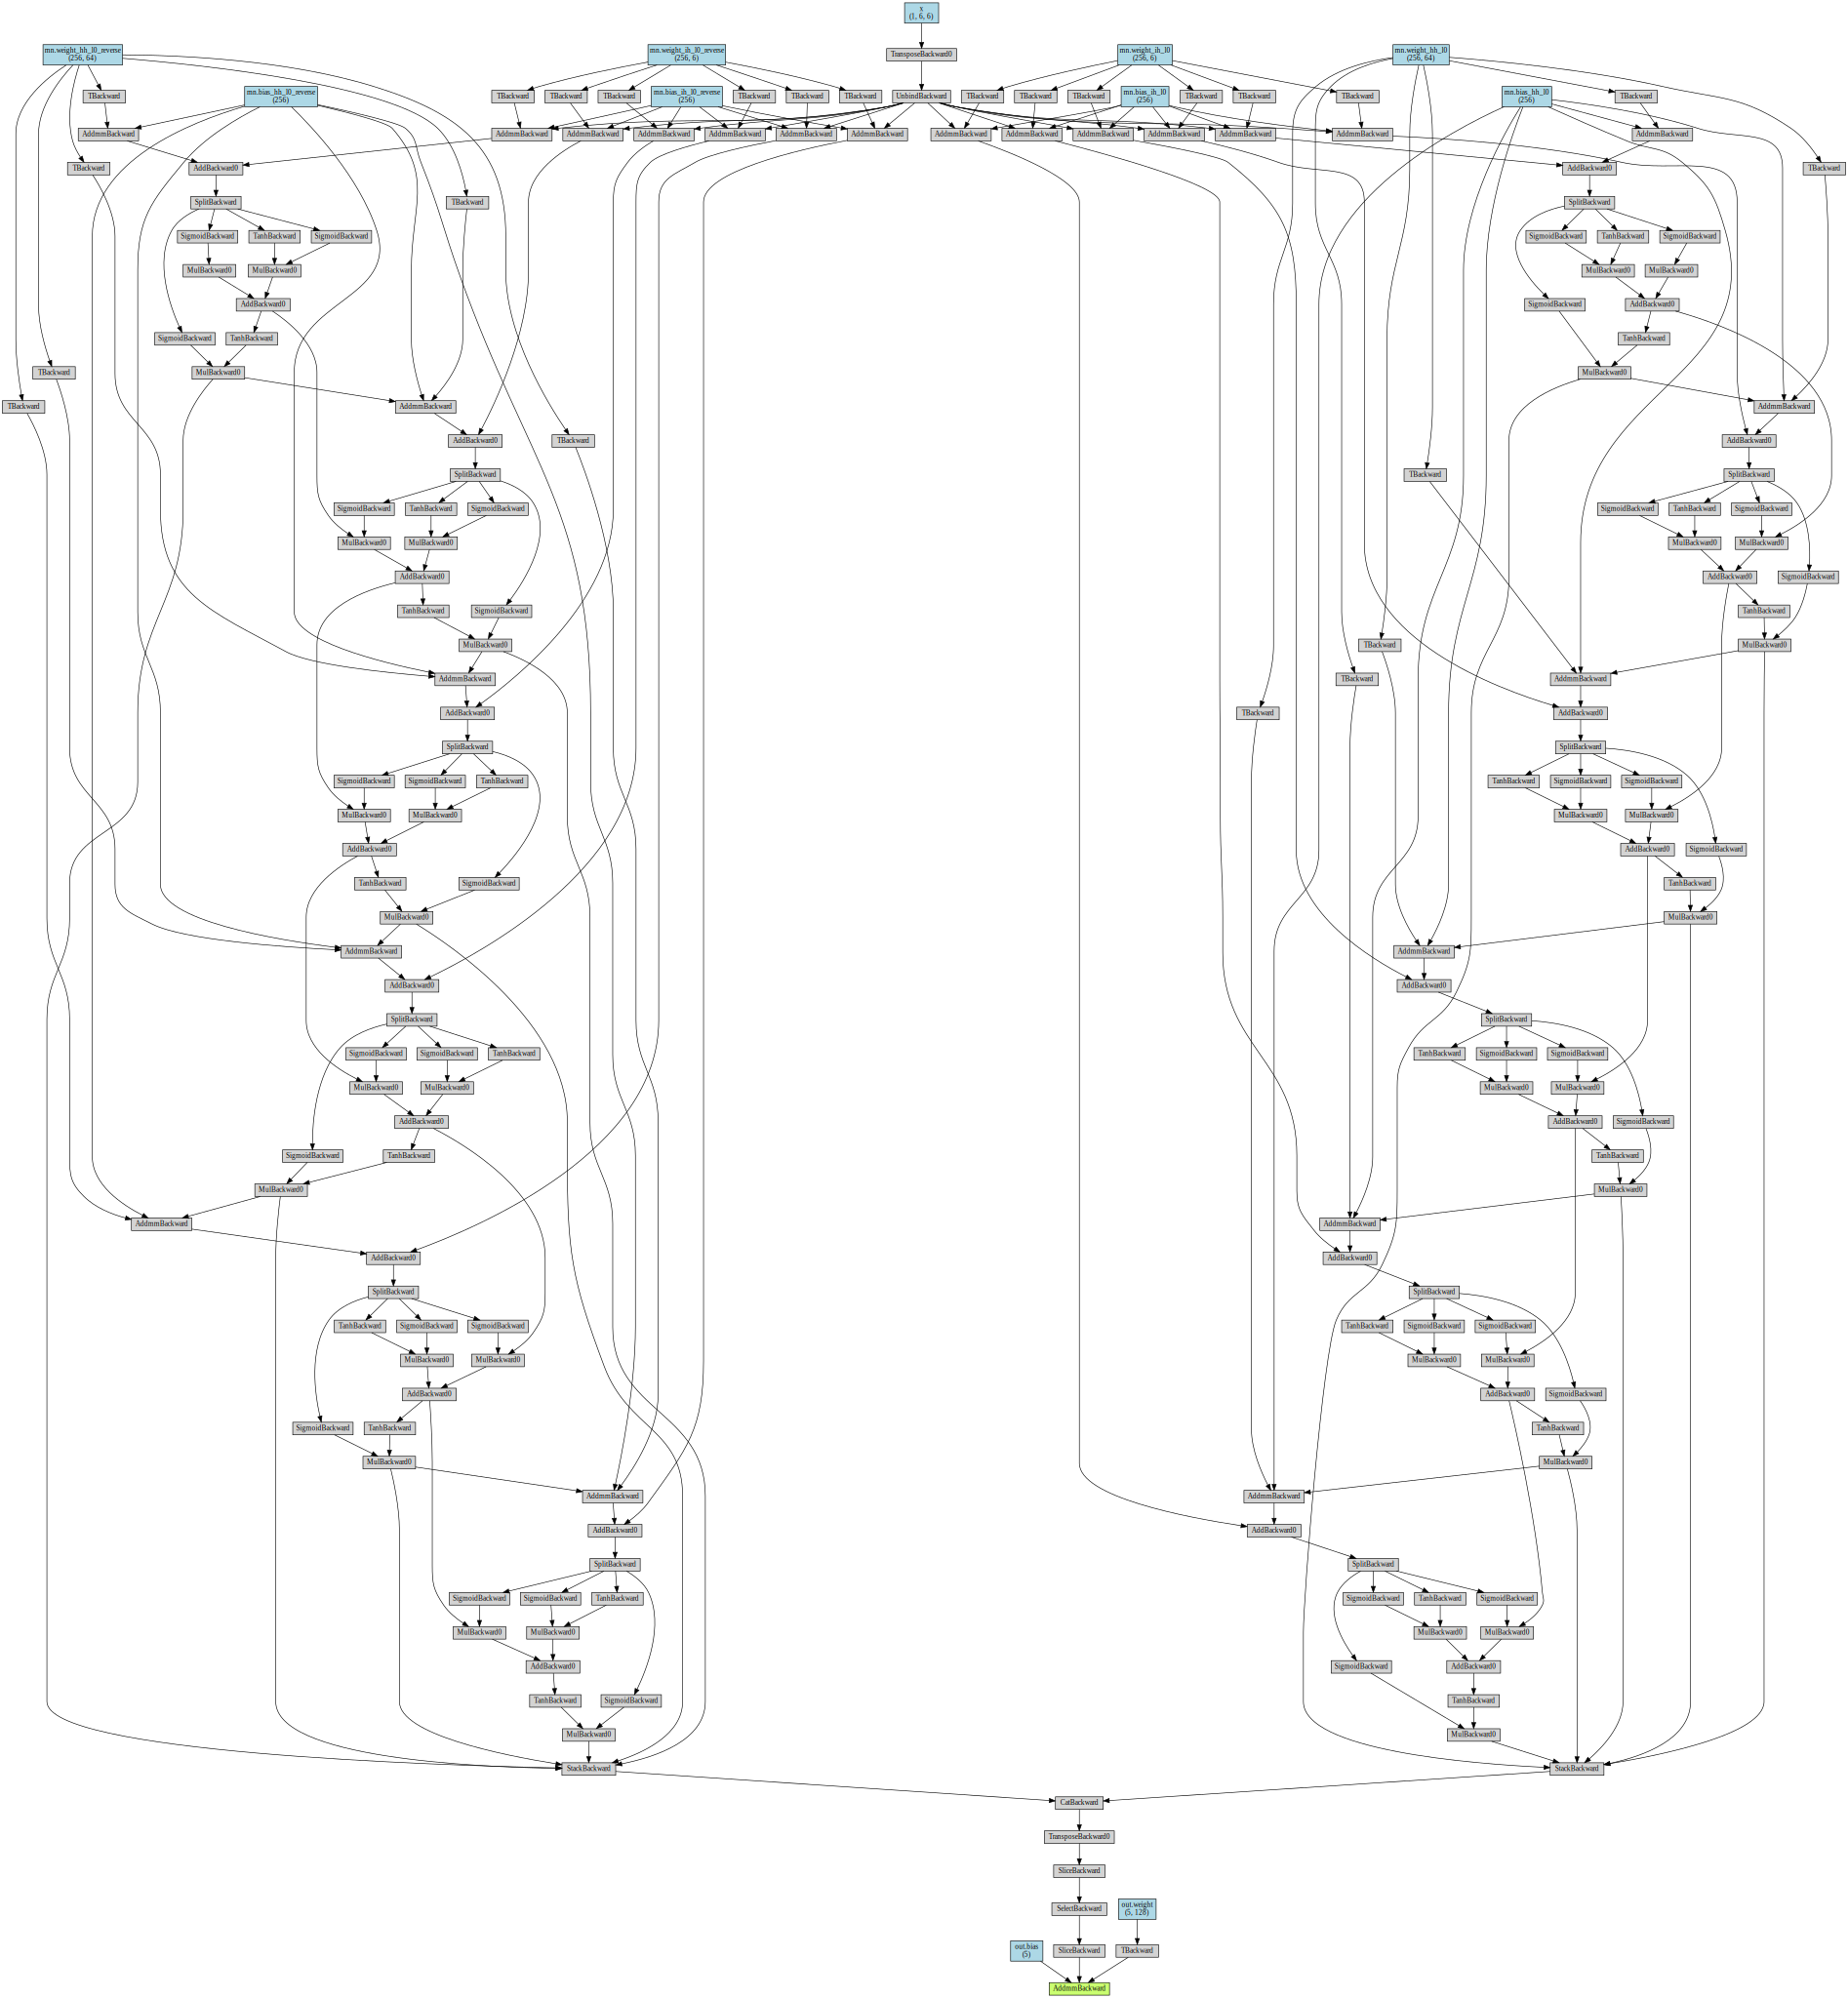

In [4]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace


from torchvision.models import AlexNet
INPUT_SIZE = 6 
#model = AlexNet()
class Bi_LSTM(nn.Module):
    def __init__(self):
        super(Bi_LSTM, self).__init__()
        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
            bidirectional=True
        )
        self.out = nn.Linear(128, 5)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state
        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out
model = Bi_LSTM()

x = torch.randn(1, 6, 6).requires_grad_(True)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))